In [13]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))

import argparse
from dataclasses import dataclass

import torch
from models.Shapelet import ShapeBottleneckModel

from data_provider.data_loader import UEAloader

import matplotlib.pyplot as plt

checkpoints_folder = '../checkpoints/'
data_folder = '../data/'

316


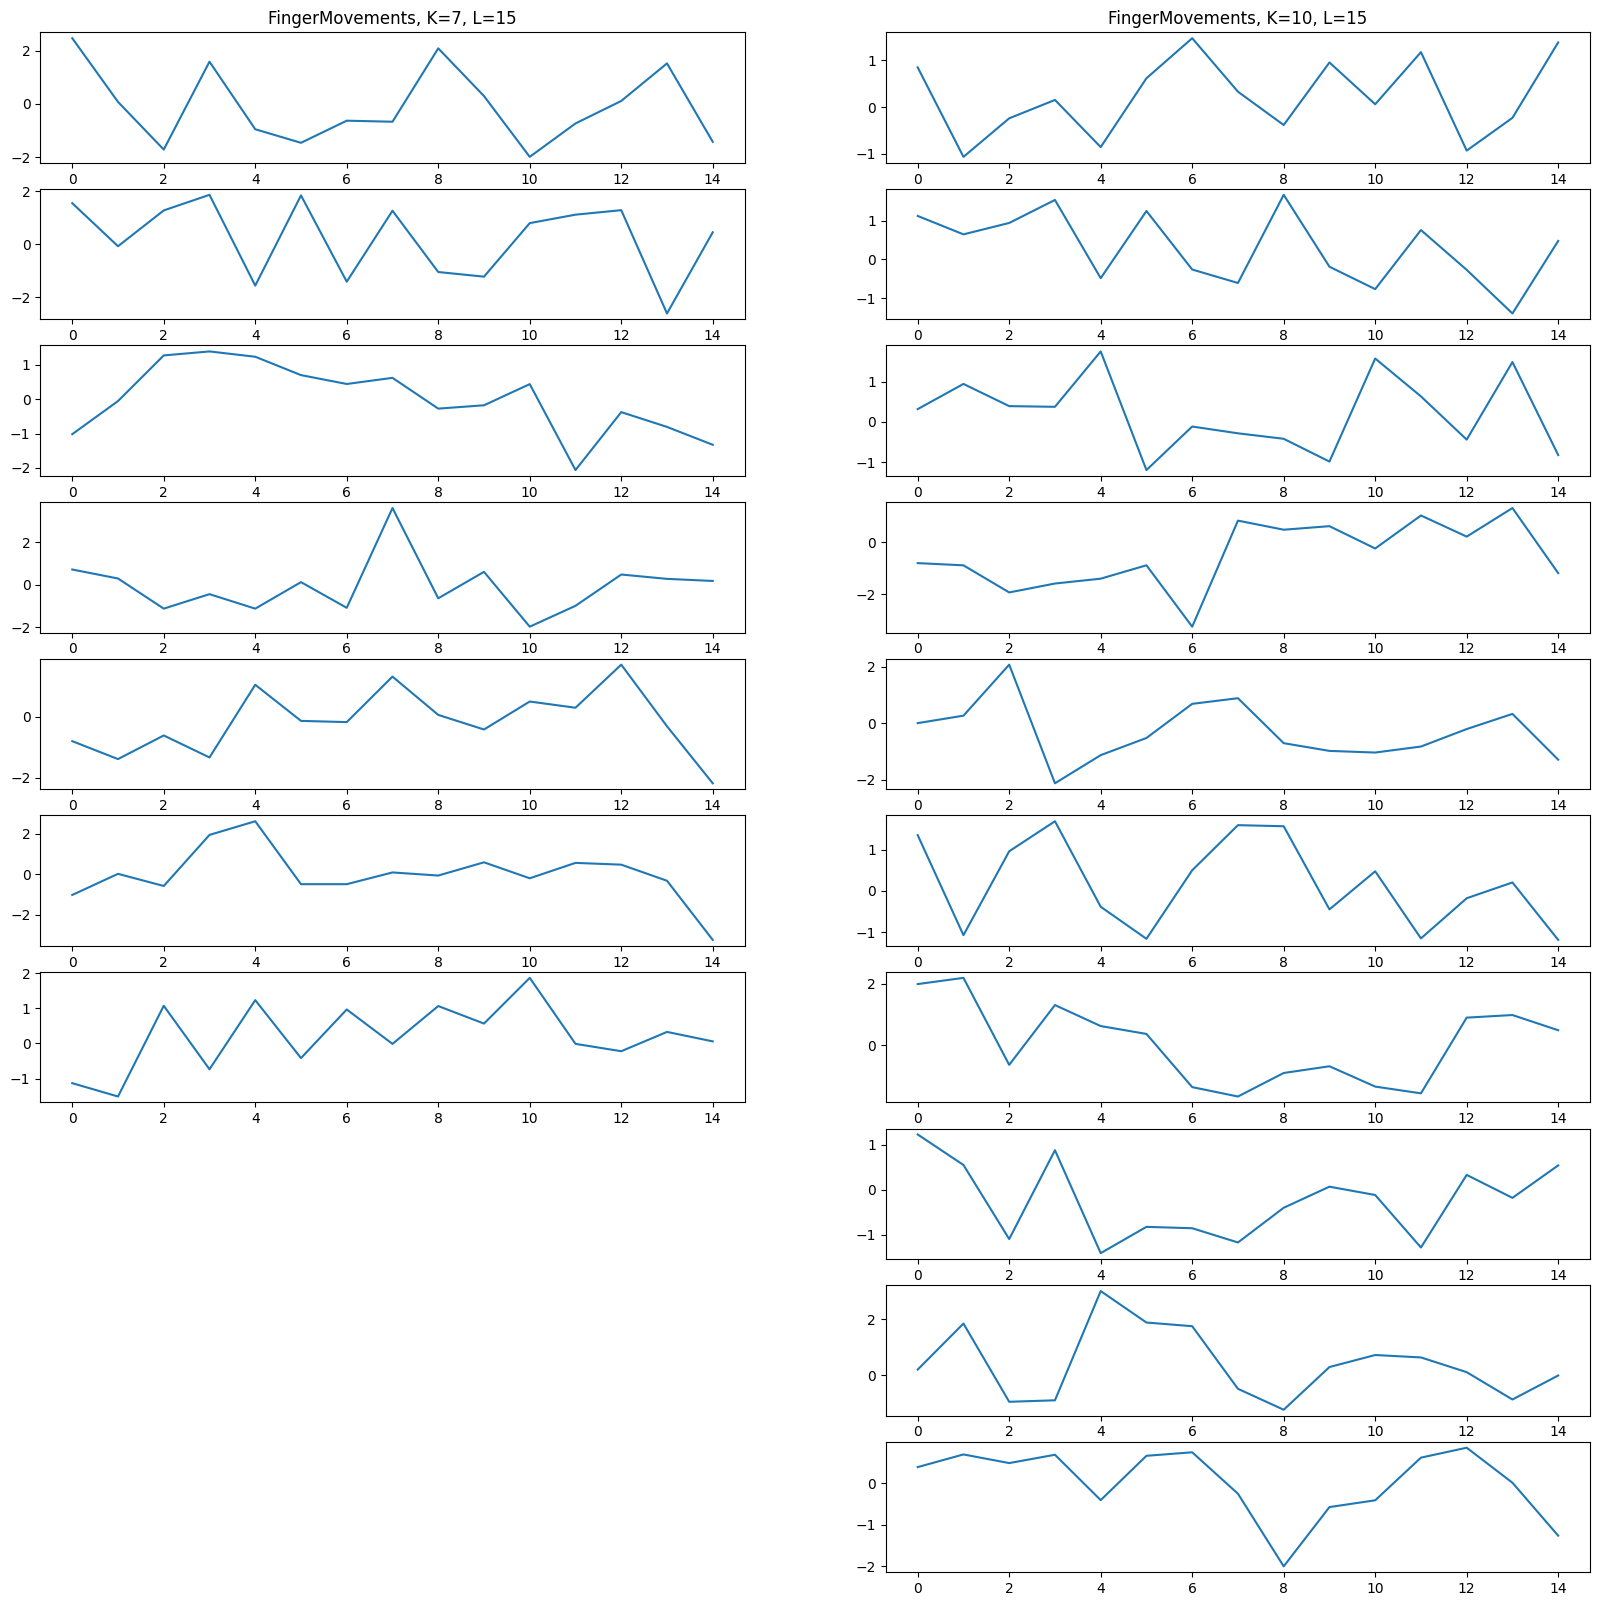

In [18]:
@dataclass
class Config:
    epsilon: float = 1.0
    distance_func: str = 'euclidean'
    memory_efficient: bool = True
    seq_len: int = 50
    enc_in: int = 28
    num_class: int = 2
    pool: str = 'max'
    sbm_cls: str = 'linear'
    dropout: float = 0.0
    lambda_div: float = 0.1
    lambda_reg: float = 0.1

root_path = data_folder + 'FingerMovements'
data = UEAloader(root_path, flag="TRAIN")

config = Config()

path_large = checkpoints_folder + 'SBM/FingerMovements/dnn-FCN_seed-0_k-10_div-0.1_reg-0.1_eps-1.0_beta-constant_dfunc-euclidean_cls-linear'
path_small = checkpoints_folder + 'SBM/FingerMovements/dnn-FCN_seed-0_k-7_div-0.1_reg-0.1_eps-1.0_beta-constant_dfunc-euclidean_cls-linear'

model_small = ShapeBottleneckModel(num_shapelet=[7, 7, 7, 7, 7, 7], shapelet_len=[0.05, 0.1, 0.2, 0.3, 0.5, 0.8], pool='max', configs=config).eval()
model_small.load_state_dict(torch.load(f"{path_small}/checkpoint.pth"))
                            
model_large =  ShapeBottleneckModel(num_shapelet=[10, 10, 10, 10, 10, 10], shapelet_len=[0.05, 0.1, 0.2, 0.3, 0.5, 0.8], pool='max', configs=config).eval()
model_large.load_state_dict(torch.load(f"{path_large}/checkpoint.pth"))

fig, axs = plt.subplots(10, 2, figsize=(20, 2 * 10))

r = 15
n = 3

for i in range(7):
    axs[i, 0].plot(range(r), model_small.shapelets[n].weights[i, 0].detach().numpy())
for i in range(7, 10):
    axs[i, 0].remove()
for i in range(10):
    axs[i, 1].plot(range(r), model_large.shapelets[n].weights[i, 0].detach().numpy())


axs[0, 0].set_title('FingerMovements, K=7, L=15')
axs[0, 1].set_title('FingerMovements, K=10, L=15')
plt.show()

268


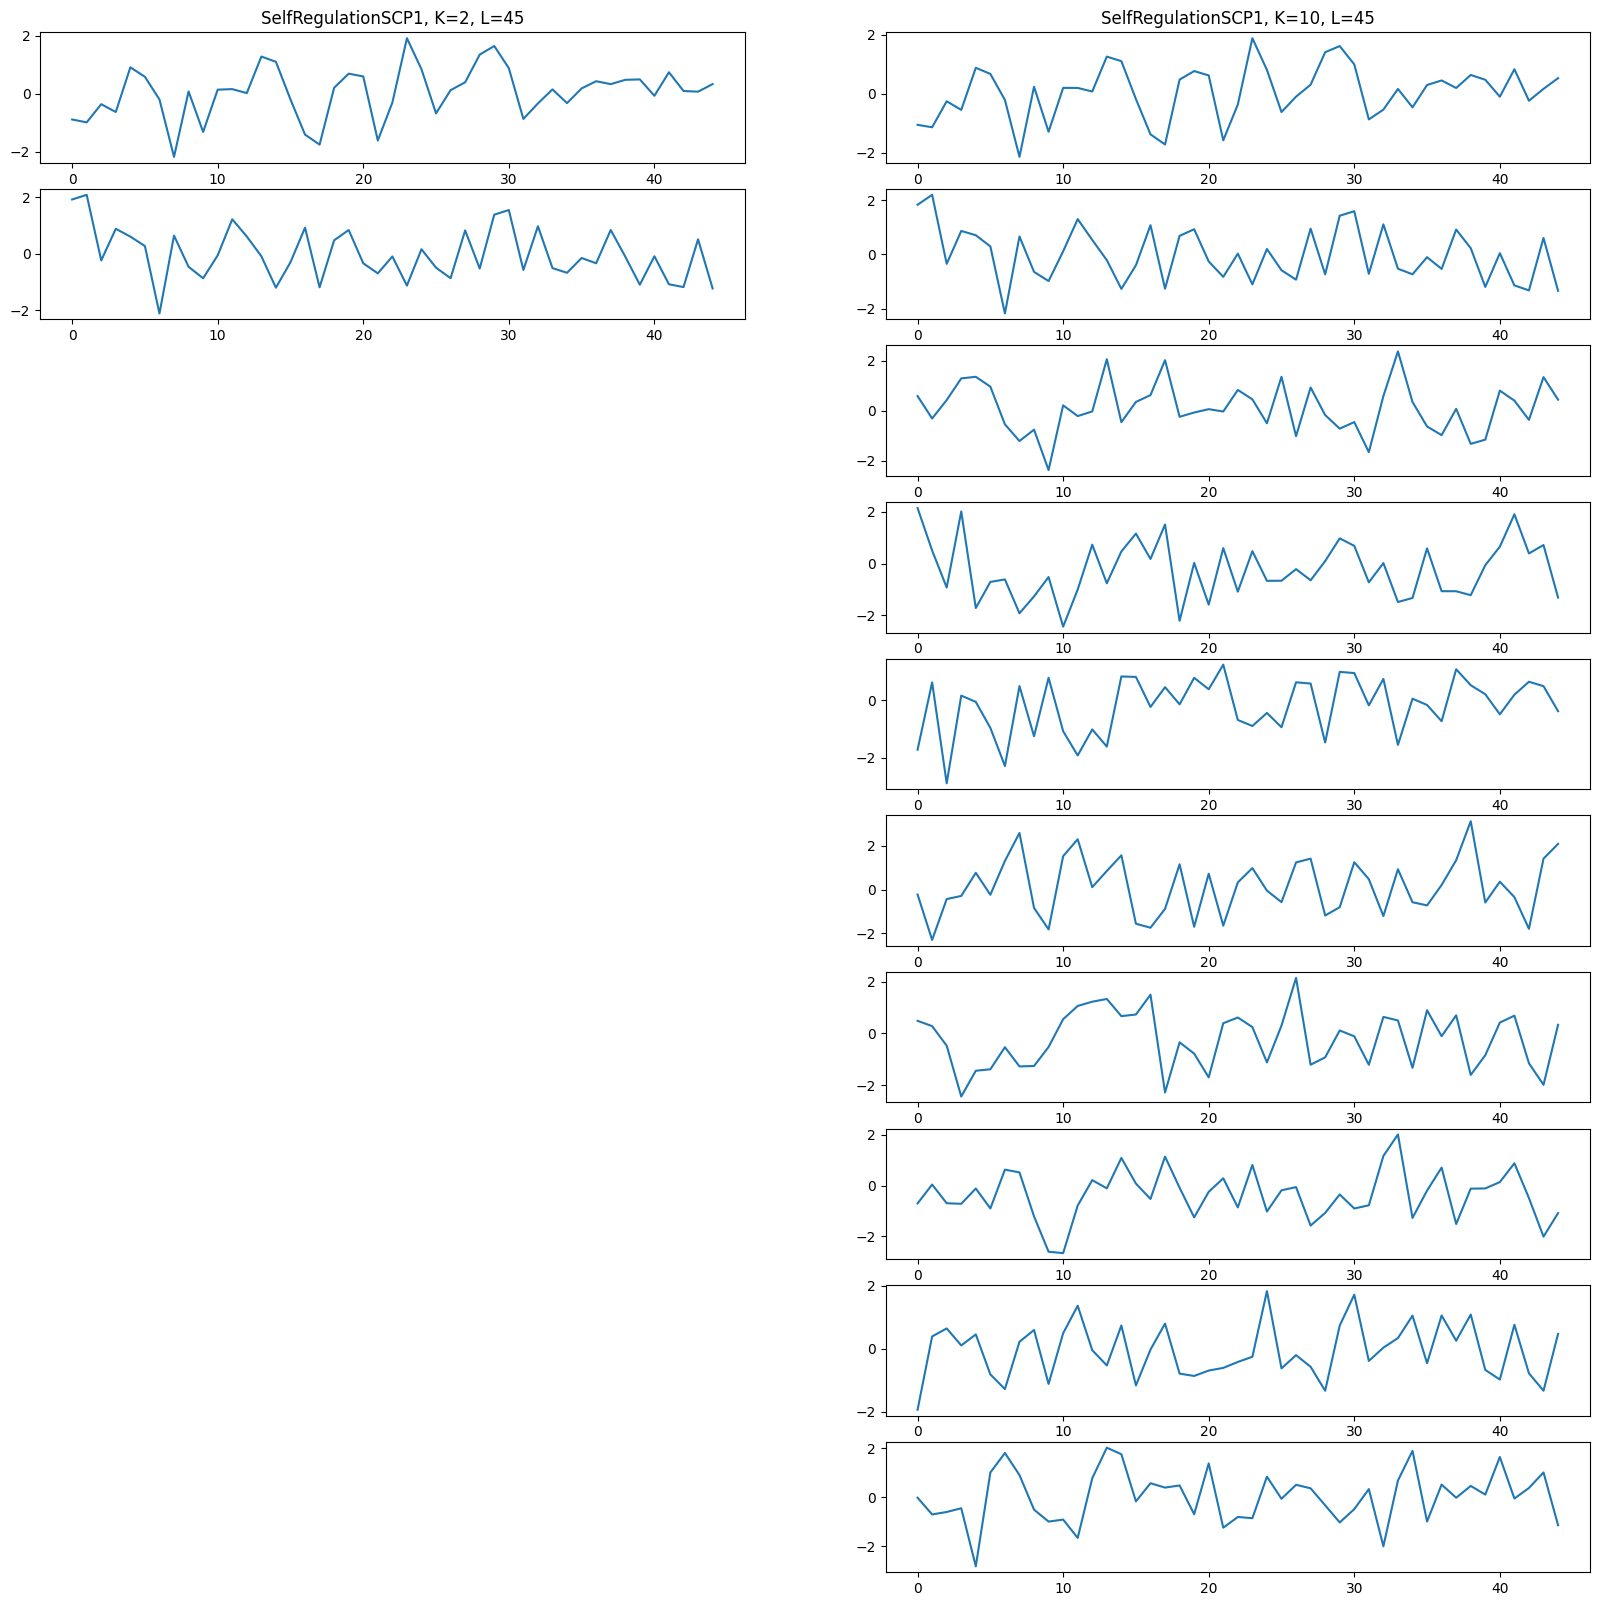

In [20]:
@dataclass
class Config:
    epsilon: float = 1.0
    distance_func: str = 'euclidean'
    memory_efficient: bool = True
    seq_len: int = 896
    enc_in: int = 6
    num_class: int = 2
    pool: str = 'max'
    sbm_cls: str = 'linear'
    dropout: float = 0.0
    lambda_div: float = 0.1
    lambda_reg: float = 0.1

root_path = data_folder + 'SelfRegulationSCP1'
data = UEAloader(root_path, flag="TRAIN")

config = Config()

path_large = checkpoints_folder + 'SBM/SelfRegulationSCP1/dnn-FCN_seed-0_k-10_div-0.1_reg-0.1_eps-1.0_beta-constant_dfunc-euclidean_cls-linear'
path_small = checkpoints_folder + 'SBM/SelfRegulationSCP1/dnn-FCN_seed-0_k-2_div-0.1_reg-0.1_eps-1.0_beta-constant_dfunc-euclidean_cls-linear'

model_small = ShapeBottleneckModel(num_shapelet=[2, 2, 2, 2, 2, 2], shapelet_len=[0.05, 0.1, 0.2, 0.3, 0.5, 0.8], pool='max', configs=config).eval()
model_small.load_state_dict(torch.load(f"{path_small}/checkpoint.pth"))
                            
model_large =  ShapeBottleneckModel(num_shapelet=[10, 10, 10, 10, 10, 10], shapelet_len=[0.05, 0.1, 0.2, 0.3, 0.5, 0.8], pool='max', configs=config).eval()
model_large.load_state_dict(torch.load(f"{path_large}/checkpoint.pth"))

fig, axs = plt.subplots(10, 2, figsize=(20, 2 * 10))

r = model_small.shapelets[0].weights.shape[2]
n = 0

for i in range(2):
    axs[i, 0].plot(range(r), model_small.shapelets[n].weights[i, 0].detach().numpy())
for i in range(2, 10):
    axs[i, 0].remove()
for i in range(10):
    axs[i, 1].plot(range(r), model_large.shapelets[n].weights[i, 0].detach().numpy())


axs[0, 0].set_title(f'SelfRegulationSCP1, K=2, L={r}')
axs[0, 1].set_title(f'SelfRegulationSCP1, K=10, L={r}')
plt.show()

200


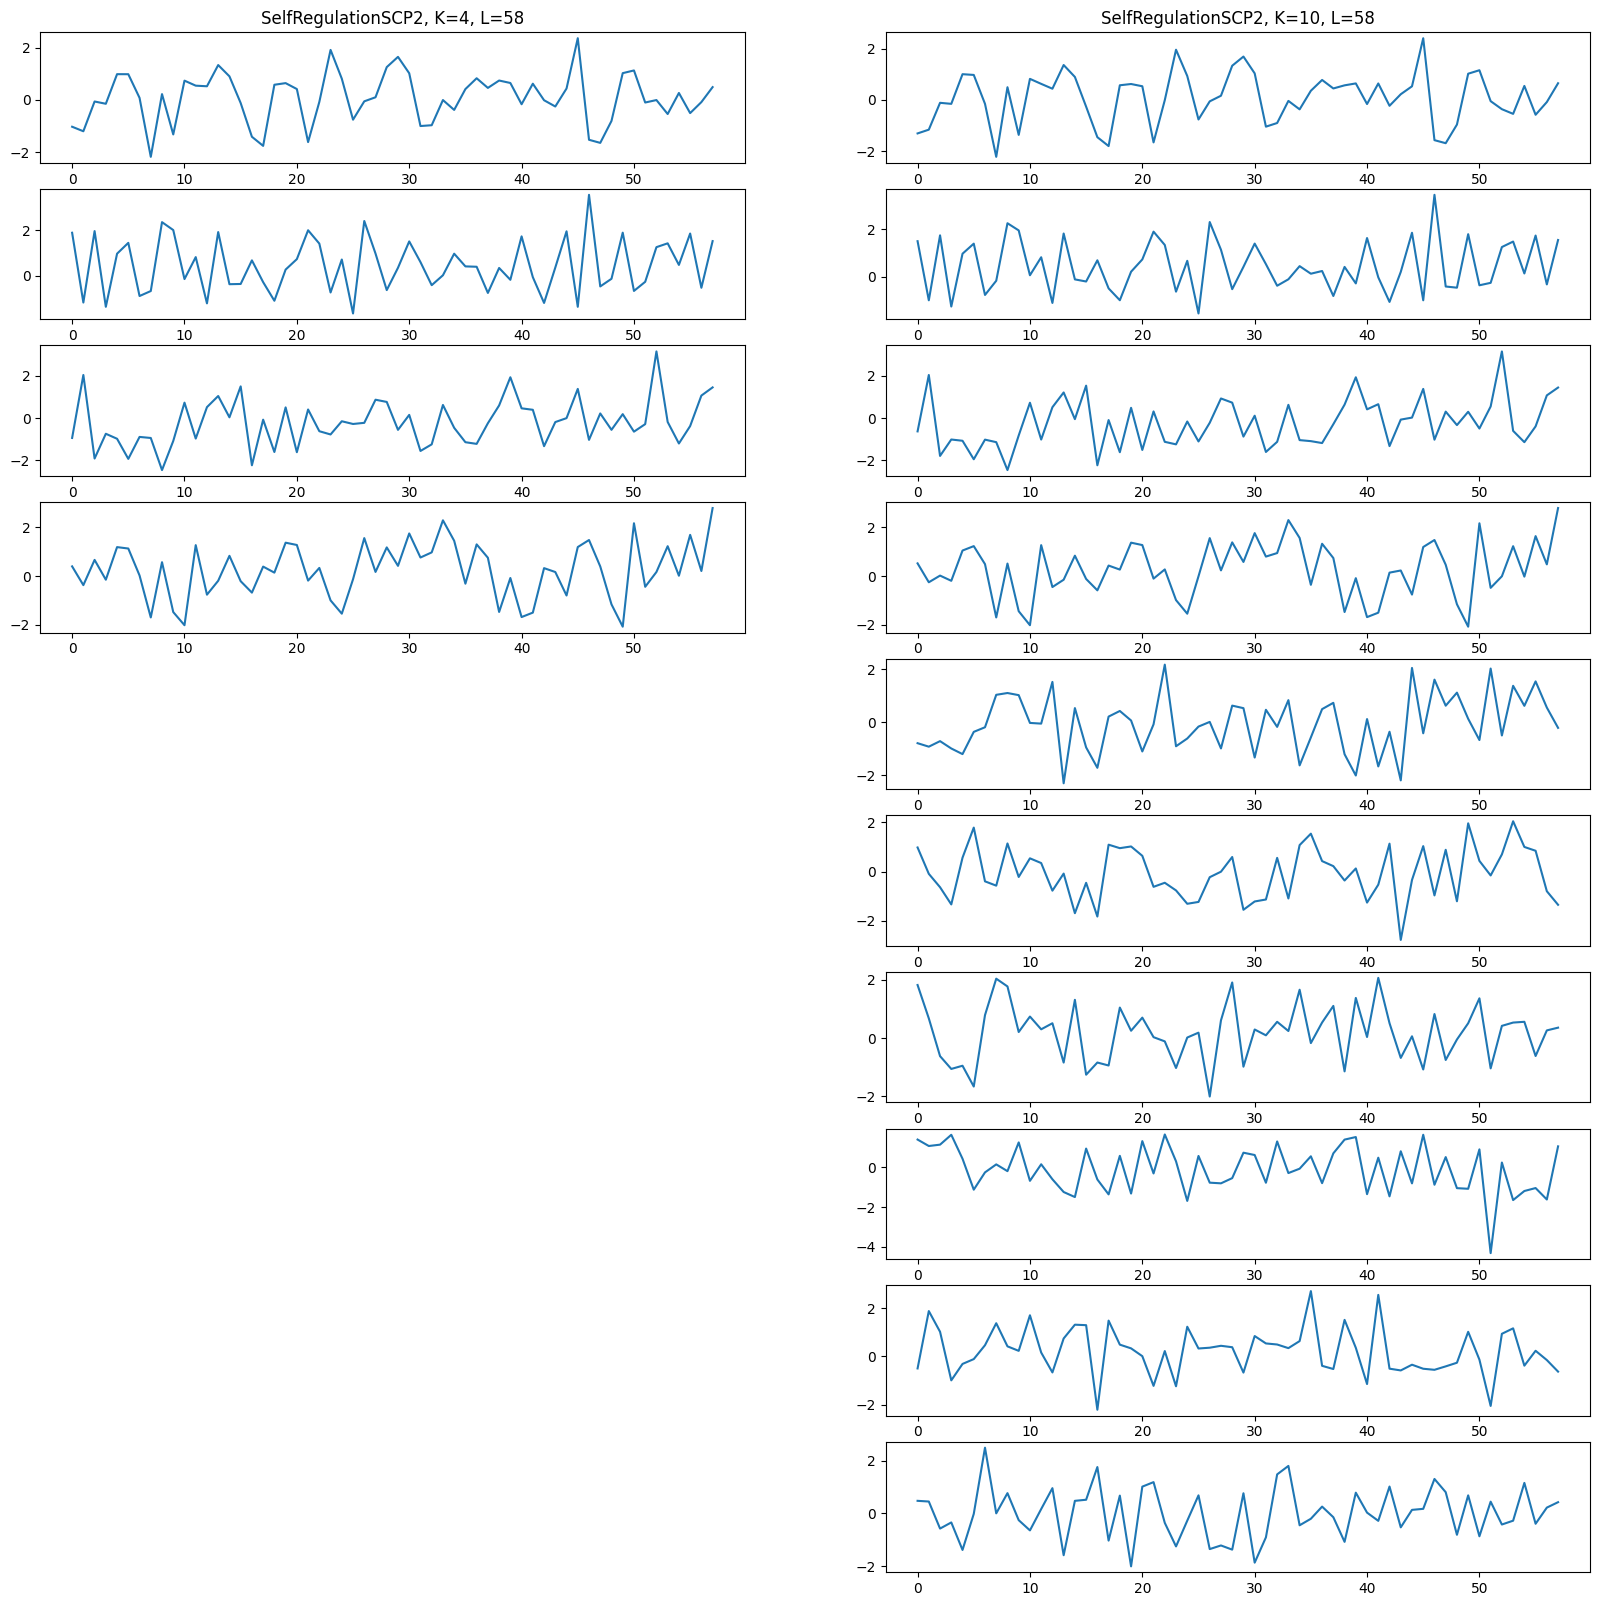

In [21]:
@dataclass
class Config:
    epsilon: float = 1.0
    distance_func: str = 'euclidean'
    memory_efficient: bool = True
    seq_len: int = 1152
    enc_in: int = 7
    num_class: int = 2
    pool: str = 'max'
    sbm_cls: str = 'linear'
    dropout: float = 0.0
    lambda_div: float = 0.1
    lambda_reg: float = 0.1

root_path = data_folder + 'SelfRegulationSCP2'
data = UEAloader(root_path, flag="TRAIN")

config = Config()

path_large = checkpoints_folder + 'SBM/SelfRegulationSCP2/dnn-FCN_seed-0_k-10_div-0.1_reg-0.1_eps-1.0_beta-constant_dfunc-euclidean_cls-linear'
path_small = checkpoints_folder + 'SBM/SelfRegulationSCP2/dnn-FCN_seed-0_k-4_div-0.1_reg-0.1_eps-1.0_beta-constant_dfunc-euclidean_cls-linear'

model_small = ShapeBottleneckModel(num_shapelet=[4, 4, 4, 4, 4, 4], shapelet_len=[0.05, 0.1, 0.2, 0.3, 0.5, 0.8], pool='max', configs=config).eval()
model_small.load_state_dict(torch.load(f"{path_small}/checkpoint.pth"))
                            
model_large =  ShapeBottleneckModel(num_shapelet=[10, 10, 10, 10, 10, 10], shapelet_len=[0.05, 0.1, 0.2, 0.3, 0.5, 0.8], pool='max', configs=config).eval()
model_large.load_state_dict(torch.load(f"{path_large}/checkpoint.pth"))

fig, axs = plt.subplots(10, 2, figsize=(20, 2 * 10))

r = model_small.shapelets[0].weights.shape[2]
n = 0

for i in range(4):
    axs[i, 0].plot(range(r), model_small.shapelets[n].weights[i, 0].detach().numpy())
for i in range(4, 10):
    axs[i, 0].remove()
for i in range(10):
    axs[i, 1].plot(range(r), model_large.shapelets[n].weights[i, 0].detach().numpy())


axs[0, 0].set_title(f'SelfRegulationSCP2, K=4, L={r}')
axs[0, 1].set_title(f'SelfRegulationSCP2, K=10, L={r}')
plt.show()